<a href="https://colab.research.google.com/github/Itskindastrange/N-Queen-using-Genetic-Algo/blob/main/N_Queen_using_Genetic_Algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import random

def random_chromosome(size):
    return [random.randint(1, nq) for _ in range(nq)]

def fitness(chromosome):
    horizontal_collisions = sum([chromosome.count(queen)-1 for queen in chromosome])/2
    diagonal_collisions = 0

    n = len(chromosome)
    left_diagonal = [0] * 2*n
    right_diagonal = [0] * 2*n
    for i in range(n):
        left_diagonal[i + chromosome[i] - 1] += 1
        right_diagonal[len(chromosome) - i + chromosome[i] - 2] += 1

    diagonal_collisions = 0
    for i in range(2*n-1):
        counter = 0
        if left_diagonal[i] > 1:
            counter += left_diagonal[i]-1
        if right_diagonal[i] > 1:
            counter += right_diagonal[i]-1
        diagonal_collisions += counter / (n-abs(i-n+1))

    return int(maxFitness - (horizontal_collisions + diagonal_collisions))

def probability(chromosome, fitness):
    return fitness(chromosome) / maxFitness

def random_pick(population, probabilities):
    populationWithProbabilty = zip(population, probabilities)
    total = sum(w for c, w in populationWithProbabilty)
    r = random.uniform(0, total)
    upto = 0
    for c, w in zip(population, probabilities):
        if upto + w >= r:
            return c
        upto += w
    assert False, "Shouldn't get here"

def reproduce(x, y):
    n = len(x)
    c = random.randint(0, n - 1)
    return x[0:c] + y[c:n]

def mutate(x):
    n = len(x)
    c = random.randint(0, n - 1)
    m = random.randint(1, n)
    x[c] = m
    return x

def genetic_queen(population, fitness):
    mutation_probability = 0.03
    new_population = []
    probabilities = [probability(n, fitness) for n in population]
    for i in range(len(population)):
        x = random_pick(population, probabilities)
        y = random_pick(population, probabilities)
        child = reproduce(x, y)
        if random.random() < mutation_probability:
            child = mutate(child)
        print_chromosome(child)
        new_population.append(child)
        if fitness(child) == maxFitness: break
    return new_population

def print_chromosome(chrom):
    print("Chromosome = {},  Fitness = {}"
        .format(str(chrom), fitness(chrom)))

nq = int(input("Enter Number of Queens: "))
maxFitness = (nq*(nq-1))/2
population = [random_chromosome(nq) for _ in range(100)]
generation = 1

while not maxFitness in [fitness(chrom) for chrom in population]:
    print("=== Generation {} ===".format(generation))
    population = genetic_queen(population, fitness)
    print("")
    print("Maximum Fitness = {}".format(max([fitness(n) for n in population])))
    generation += 1

chrom_out = []
print("Solved in Generation {}!".format(generation-1))
for chrom in population:
    if fitness(chrom) == maxFitness:
        print("")
        print("One of the solutions: ")
        chrom_out = chrom
        print_chromosome(chrom)

board = []
for x in range(nq):
    board.append(["x"] * nq)

for i in range(nq):
    board[nq-chrom_out[i]][i]="Q"


def print_board(board):
    for row in board:
        print(" ".join(row))

print()
print_board(board)

Enter Number of Queens: 4
=== Generation 1 ===
Chromosome = [2, 4, 4, 4],  Fitness = 2
Chromosome = [2, 2, 1, 1],  Fitness = 3
Chromosome = [2, 2, 4, 3],  Fitness = 4
Chromosome = [4, 3, 3, 1],  Fitness = 4
Chromosome = [1, 1, 1, 4],  Fitness = 2
Chromosome = [4, 1, 1, 4],  Fitness = 4
Chromosome = [1, 4, 2, 4],  Fitness = 4
Chromosome = [4, 2, 2, 4],  Fitness = 3
Chromosome = [3, 2, 1, 4],  Fitness = 5
Chromosome = [4, 1, 2, 4],  Fitness = 4
Chromosome = [1, 4, 3, 1],  Fitness = 4
Chromosome = [2, 2, 3, 4],  Fitness = 4
Chromosome = [1, 2, 3, 2],  Fitness = 4
Chromosome = [4, 2, 1, 4],  Fitness = 4
Chromosome = [1, 1, 2, 2],  Fitness = 3
Chromosome = [3, 1, 3, 4],  Fitness = 4
Chromosome = [3, 3, 3, 1],  Fitness = 2
Chromosome = [4, 1, 2, 4],  Fitness = 4
Chromosome = [1, 1, 2, 2],  Fitness = 3
Chromosome = [1, 1, 3, 4],  Fitness = 4
Chromosome = [1, 4, 4, 1],  Fitness = 4
Chromosome = [4, 3, 2, 2],  Fitness = 4
Chromosome = [4, 3, 1, 4],  Fitness = 4
Chromosome = [1, 2, 4, 1],  Fitne

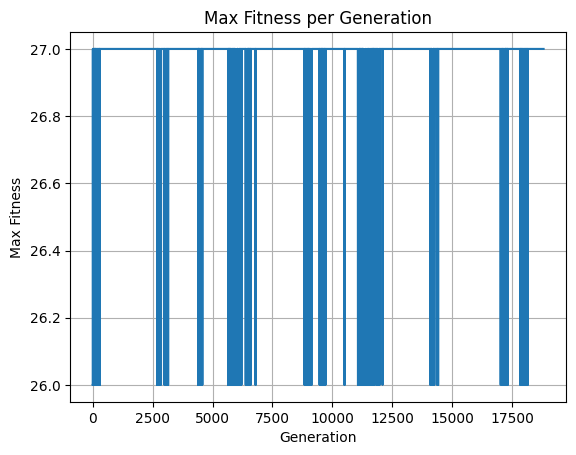

In [13]:
import random
import matplotlib.pyplot as plt

def random_chromosome(size):
    return [random.randint(1, nq) for _ in range(nq)]

def fitness(chromosome):
    horizontal_collisions = sum([chromosome.count(queen)-1 for queen in chromosome]) / 2
    diagonal_collisions = 0

    n = len(chromosome)
    left_diagonal = [0] * (2 * n)
    right_diagonal = [0] * (2 * n)
    for i in range(n):
        left_diagonal[i + chromosome[i] - 1] += 1
        right_diagonal[len(chromosome) - i + chromosome[i] - 2] += 1

    for i in range(2 * n - 1):
        counter = 0
        if left_diagonal[i] > 1:
            counter += left_diagonal[i] - 1
        if right_diagonal[i] > 1:
            counter += right_diagonal[i] - 1
        diagonal_collisions += counter / (n - abs(i - n + 1))

    return int(maxFitness - (horizontal_collisions + diagonal_collisions))

def probability(chromosome, fitness):
    return fitness(chromosome) / maxFitness

def random_pick(population, probabilities):
    population_with_probability = zip(population, probabilities)
    total = sum(w for c, w in population_with_probability)
    r = random.uniform(0, total)
    upto = 0
    for c, w in zip(population, probabilities):
        if upto + w >= r:
            return c
        upto += w
    assert False, "Shouldn't get here"

def reproduce(x, y):
    n = len(x)
    c = random.randint(0, n - 1)
    return x[0:c] + y[c:n]

def mutate(x):
    n = len(x)
    c = random.randint(0, n - 1)
    m = random.randint(1, n)
    x[c] = m
    return x

def genetic_queen(population, fitness):
    mutation_probability = 0.03
    generation = 1
    max_fitness_values = []

    while not maxFitness in [fitness(chrom) for chrom in population]:
        max_fitness = max([fitness(n) for n in population])
        max_fitness_values.append(max_fitness)

        new_population = []
        probabilities = [probability(n, fitness) for n in population]
        for _ in range(len(population)):
            x = random_pick(population, probabilities)
            y = random_pick(population, probabilities)
            child = reproduce(x, y)
            if random.random() < mutation_probability:
                child = mutate(child)
            new_population.append(child)
        population = new_population

        generation += 1

    chrom_out = []
    for chrom in population:
        if fitness(chrom) == maxFitness:
            chrom_out = chrom
            break

    plt.plot(range(1, generation), max_fitness_values)
    plt.xlabel('Generation')
    plt.ylabel('Max Fitness')
    plt.title('Max Fitness per Generation')
    plt.grid(True)
    plt.show()

    return chrom_out


nq = int(input("Enter Number of Queens: "))
maxFitness = (nq * (nq - 1)) / 2
population = [random_chromosome(nq) for _ in range(100)]

solution = genetic_queen(population, fitness)
